In [1]:
import os
os.chdir('..')
from data import get_dataset
import numpy as np
from model import Model
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import umap
from utils import get_feature_matrix

In [2]:
dataset1_test = get_dataset(f"mnist", test=True, known=-1)
dataset2_test = get_dataset(f"svhn", test=True, known=-1)
dataloader1t = torch.utils.data.DataLoader(
        dataset1_test, batch_size=512, shuffle=False, drop_last=False
)
dataloader2t = torch.utils.data.DataLoader(
        dataset2_test, batch_size=512, shuffle=False, drop_last=False
)

Using downloaded and verified file: datasets/test_32x32.mat


In [3]:
net = Model(mode="digits", instance_norm=False, spectral_norm=True, backbone="vat", disc_type="conditional").cuda()

In [4]:
dics = torch.load(f"weights/ours_umap.pth", map_location=torch.device('cuda'))
net.load_state_dict(dics)

<All keys matched successfully>

In [5]:
d1_feats, d2_feats = get_feature_matrix(net, dataloader1t, dataloader2t)

100%|██████████| 51/51 [00:09<00:00,  5.40it/s]


In [6]:
all_feats = np.concatenate([d1_feats, d2_feats])
stop = len(d1_feats)
# n_neighbors = 5 to 20
ubeds = umap.UMAP(verbose=True, n_neighbors=75, metric="euclidean").fit_transform(all_feats)
d1_ubeds = ubeds[:stop]
d2_ubeds = ubeds[stop:]

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=75, verbose=True)
Construct fuzzy simplicial set
Wed Jun  2 16:47:03 2021 Finding Nearest Neighbors
Wed Jun  2 16:47:03 2021 Building RP forest with 14 trees
Wed Jun  2 16:47:03 2021 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	Stopping threshold met -- exiting after 2 iterations
Wed Jun  2 16:47:19 2021 Finished Nearest Neighbor Search
Wed Jun  2 16:47:21 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Jun  2 16:47:35 2021 Finished embedding


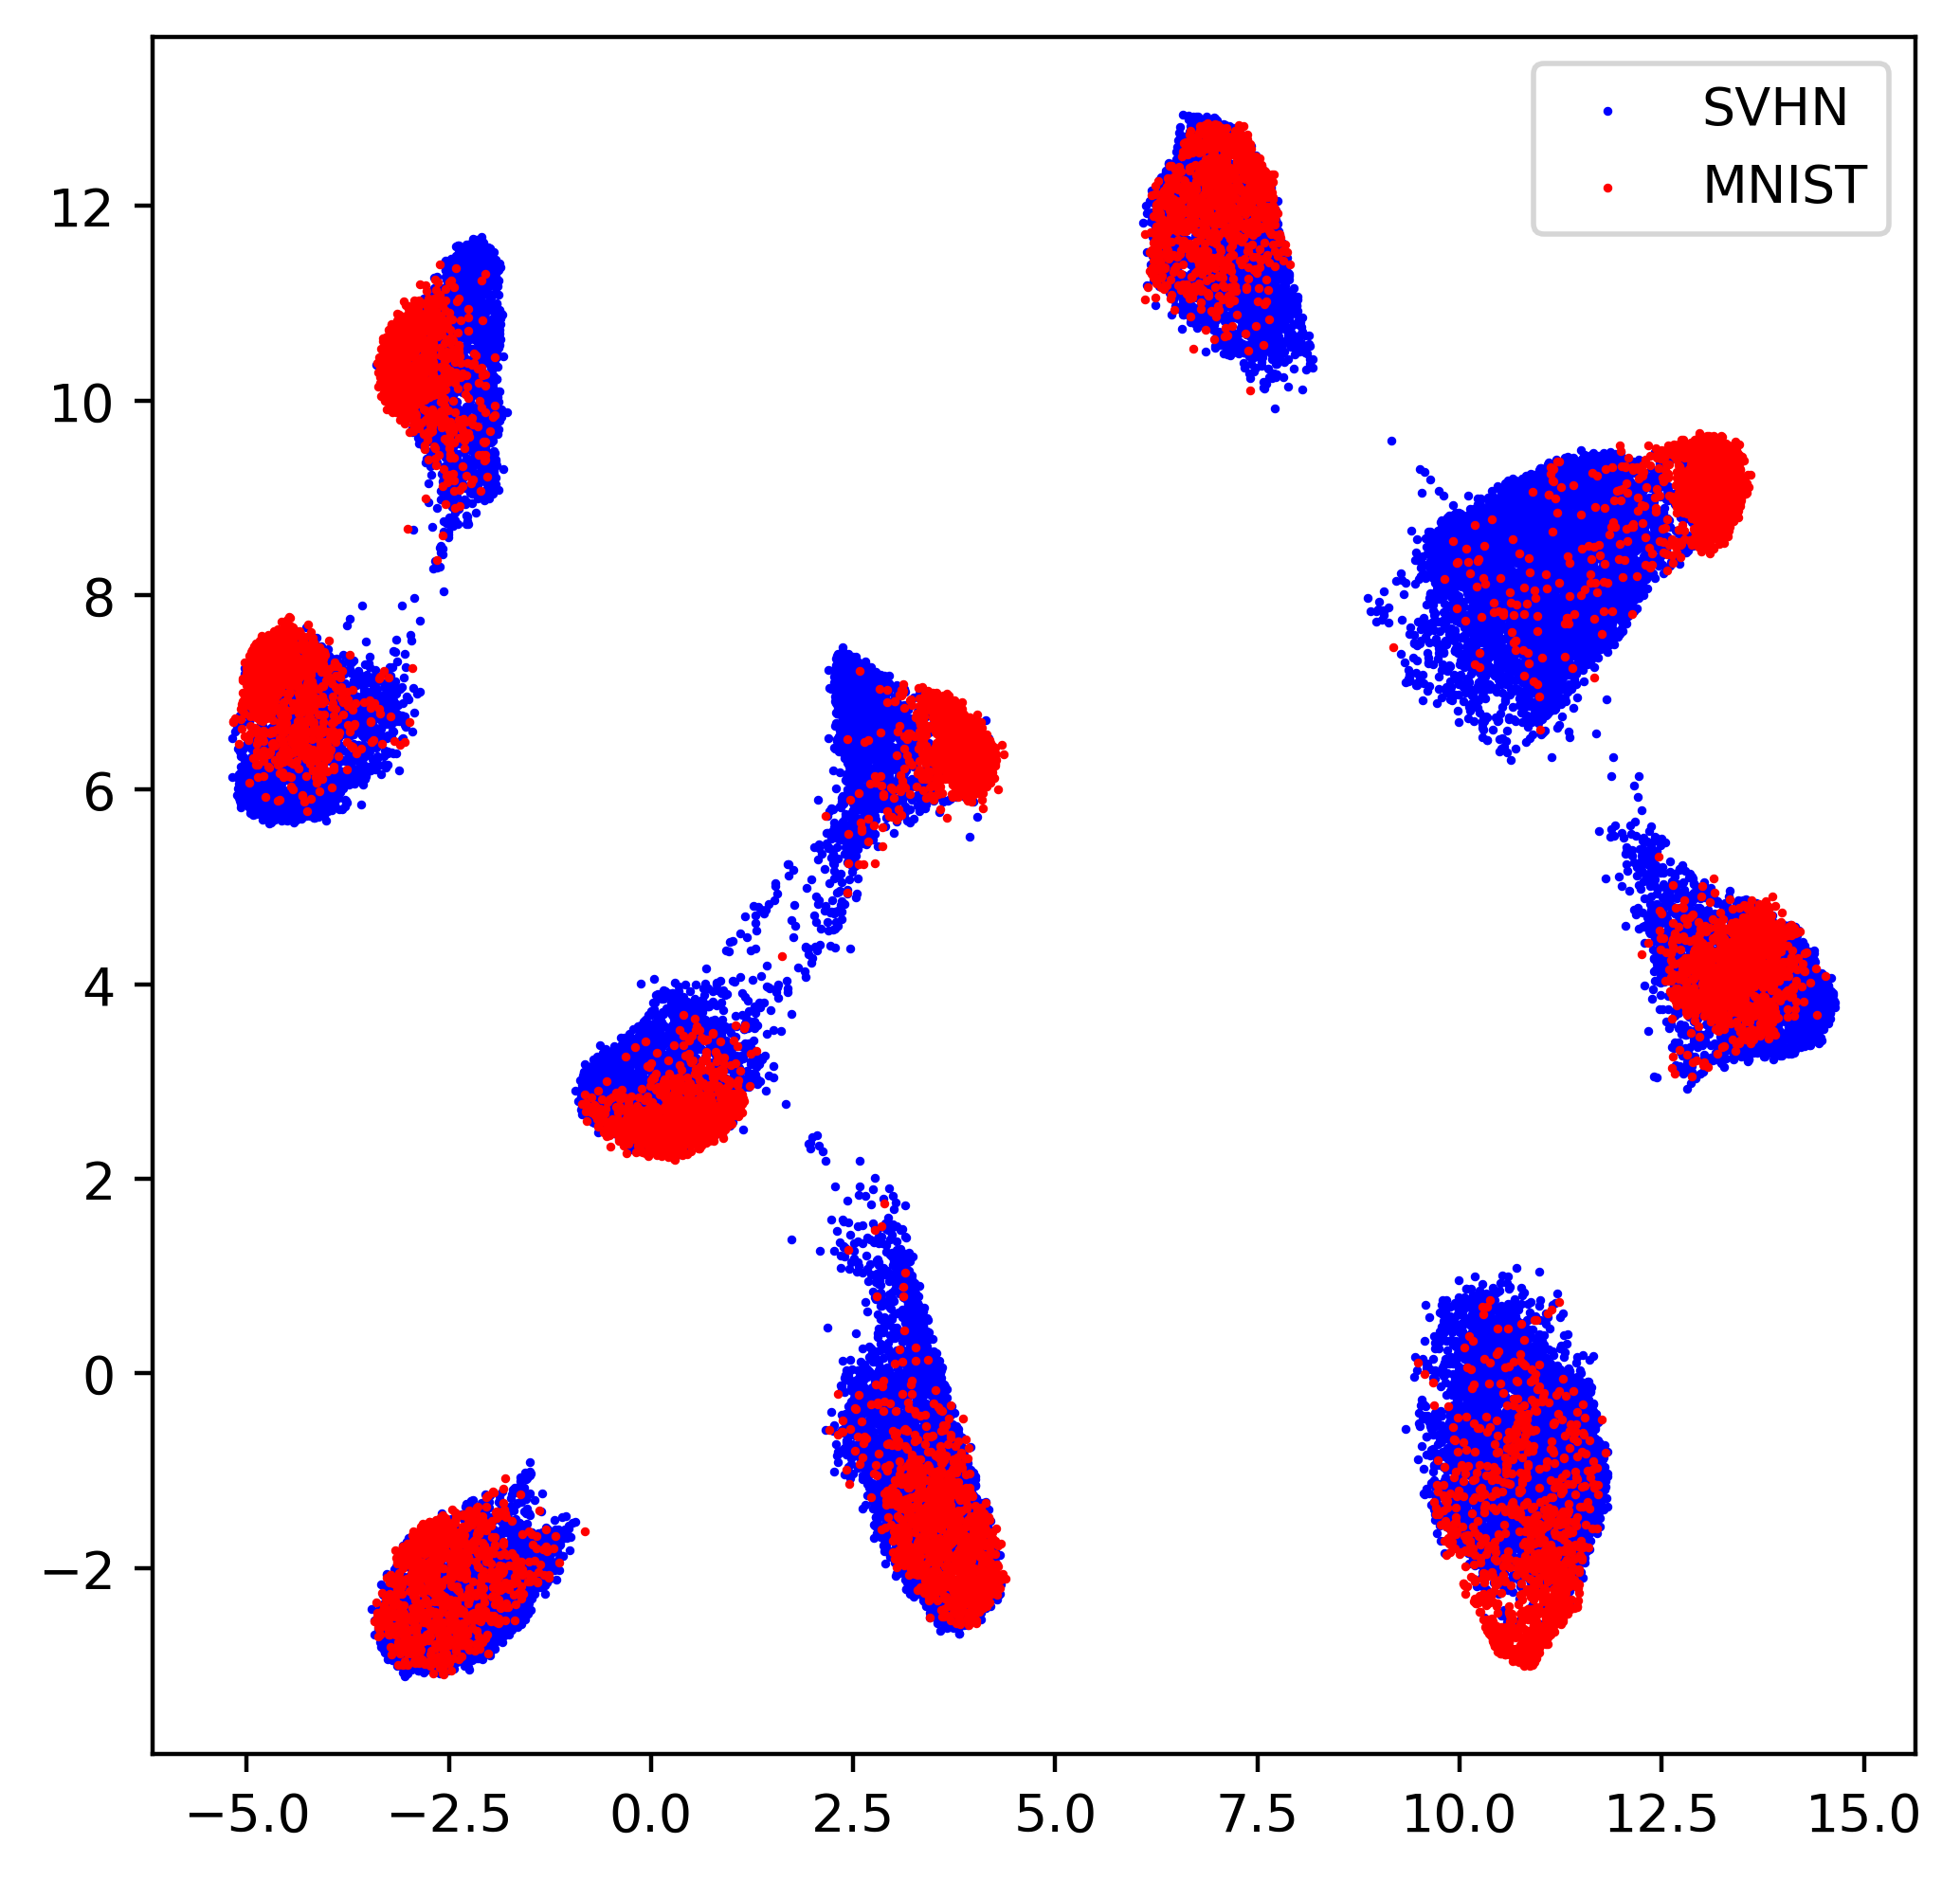

In [7]:
plt.figure(figsize=(6,6), dpi=400)
plt.scatter(d2_ubeds[:, 0], d2_ubeds[:, 1], s=0.5, color="blue", label="SVHN")
plt.scatter(d1_ubeds[:, 0], d1_ubeds[:, 1], s=0.5, color="red", label="MNIST")
plt.legend()

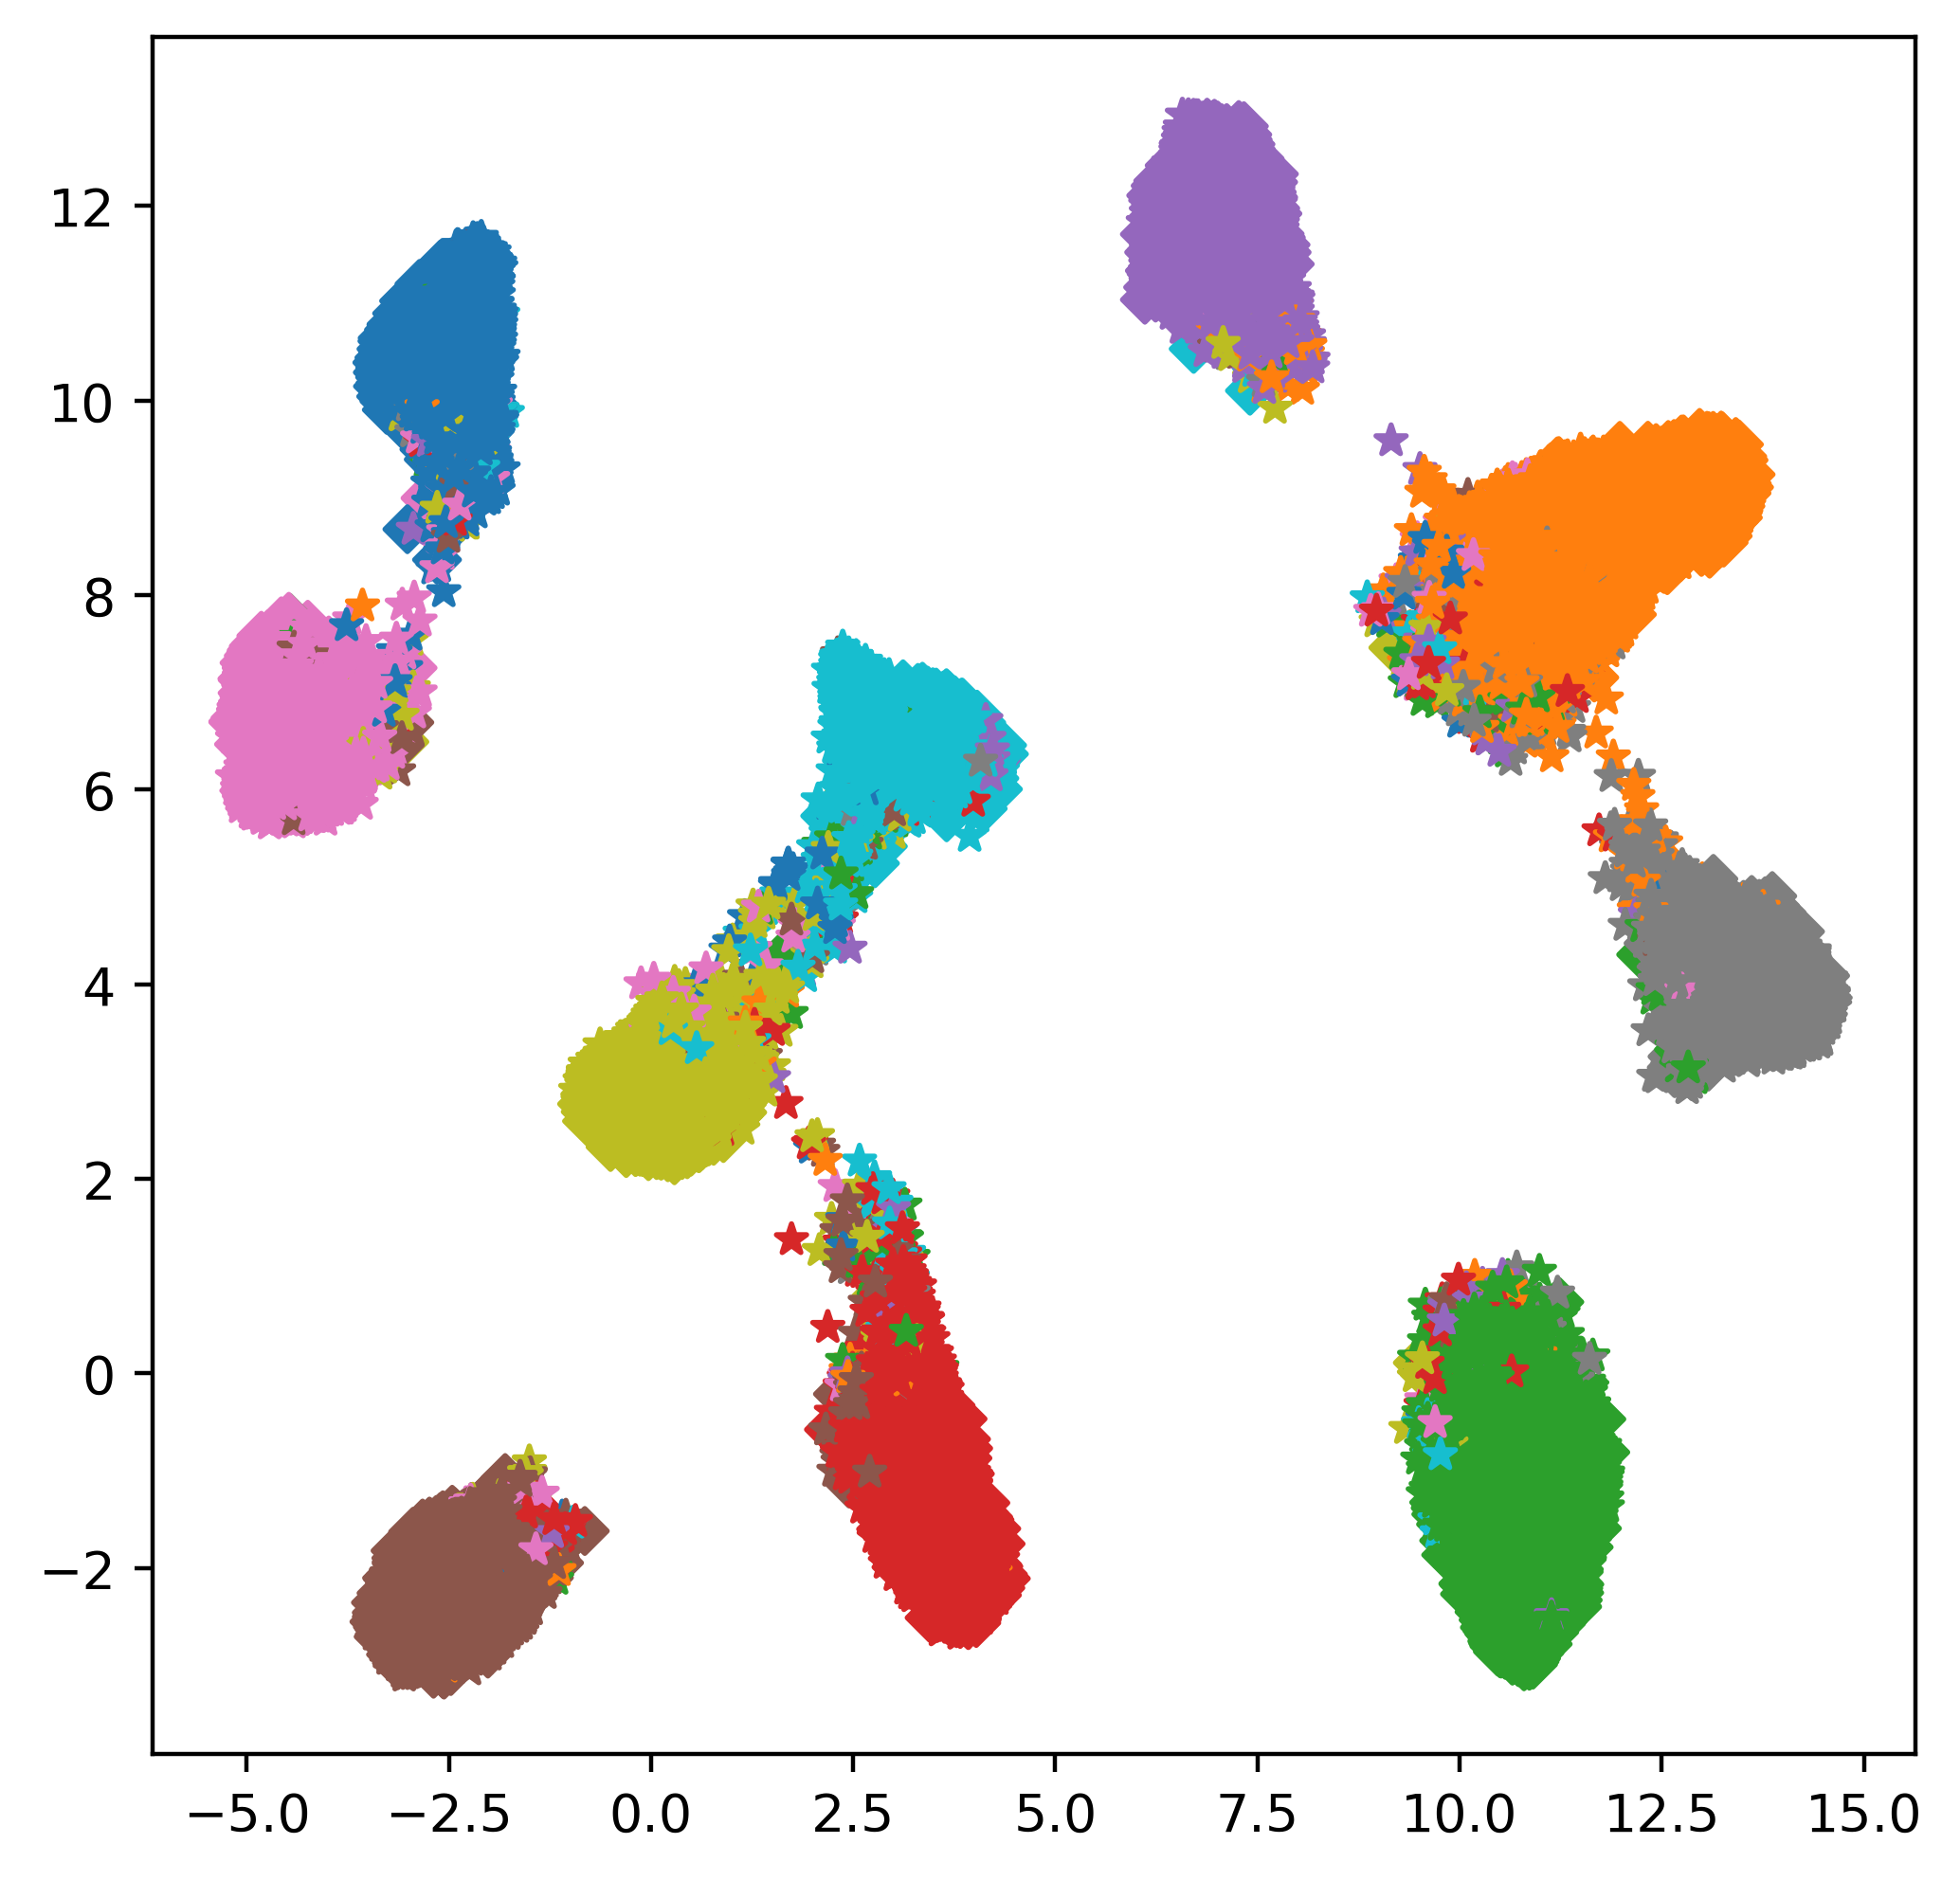

In [10]:
d1_y = dataset1_test.dataset.targets
d2_y = dataset2_test.dataset.labels
plt.figure(figsize=(6,6), dpi=400)
plt.scatter(d1_ubeds[:, 0], d1_ubeds[:, 1], c=d1_y, marker="D", 
            label="MNIST", vmin=-0.5, vmax=9.5, cmap="tab10")
plt.scatter(d2_ubeds[:, 0], d2_ubeds[:, 1], c=d2_y, marker="*", 
            label="SVHN", vmin=-0.5, vmax=9.5, cmap="tab10")